In [7]:
from pathlib import Path

from experiment import Experiment
from utils.stat_utils import stats_to_distribution, generate_discrete_distribution, plot_statistics
from utils.data_utils import input_data_to_df, output_data_to_df

import matplotlib.pyplot as plt


In [3]:
notebook_base_path = Path('/Users/konstantingrotov/Documents/programming/projects/clones-study/data/out/notebooks_1k')
scripts_base_path = Path('/Users/konstantingrotov/Documents/programming/projects/clones-study/data/out/scripts_1k')

e = Experiment(
    notebooks_folder=notebook_base_path,
    scripts_folder=scripts_base_path,
    in_path=None,
    max_num=1_000
)

min_clone_length, max_clone_length = 3, 91
e.run(normalize=False, drop_breaks=False, length_range=range(min_clone_length, max_clone_length))


999it [00:00, 1386.31it/s]
955it [00:00, 1463.45it/s]


In [5]:
ntb_stats_df = e.aggregated_stats.get('notebooks')
scr_stats_df = e.aggregated_stats.get('scripts')


In [82]:
ntb_stats_df.head()

,groups_cnt,clones_cnt,min_length
0,30.0,77.0,3
1,27.0,71.0,4
2,22.0,54.0,5
3,17.0,42.0,6
4,16.0,40.0,7


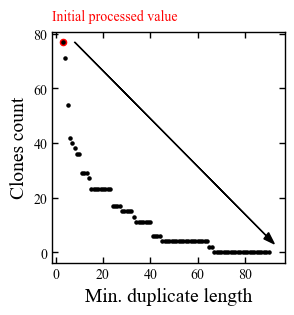

In [120]:
plt.rcParams["font.family"] = "Times New Roman"
width = 1
length = 4

x, y = ntb_stats_df.iloc[:90-3 + 1].min_length.to_numpy(), ntb_stats_df.iloc[:90-3 + 1].clones_cnt.to_numpy()

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(x[0], y[0], color='r', s=20, alpha=1)
ax.scatter(x, y, color='k', s=5, alpha=1)
ax.text(0, 1.05, "Initial processed value", color='r', fontsize=10, transform=ax.transAxes)

stats_tmp = ntb_stats_df.groupby("min_length").mean().reset_index()

ax.set_xlabel("Min. duplicate length", fontsize=14)
ax.set_ylabel("Clones count", fontsize=14)

ax.tick_params(direction="in", length=length, width=width, labelsize=10)
ax.tick_params(direction="in", which='minor', labelsize=10)

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')


ax.arrow(
    x[0] + 5, y[0], x[-1]-x[1] - 5, y[-1]-y[0] + 1 + 5,
    head_width = 3, width = 0.05, color='k'
)


for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(width)

# fig.savefig("figures/stage_1_0.png", bbox_inches='tight', dpi=200)



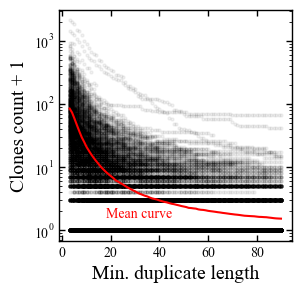

In [75]:
plt.rcParams["font.family"] = "Times New Roman"
width = 1
length = 4

x, y = ntb_stats_df.min_length.to_numpy(), ntb_stats_df.clones_cnt.to_numpy()

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(x, y + 1, color='k', s=5, alpha=0.05)

stats_tmp = ntb_stats_df.groupby("min_length").mean().reset_index()
x, y = stats_tmp.min_length.to_numpy(), stats_tmp.clones_cnt.to_numpy() + 1
ax.plot(x, y, color='r')
ax.text(0.2, 0.1, r"Mean curve", transform=ax.transAxes, fontsize=10, color='r')

ax.set_xlabel("Min. duplicate length", fontsize=14)
ax.set_ylabel("Clones count + 1", fontsize=14)
ax.set_yscale('log')

ax.tick_params(direction="in", length=length, width=width, labelsize=10)
ax.tick_params(direction="in", which='minor', labelsize=10)

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')



for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(width)

# fig.savefig("figures/stage_1_1.png", bbox_inches='tight', dpi=200)



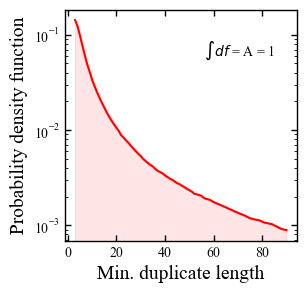

In [67]:
plt.rcParams["font.family"] = "Times New Roman"
width = 1
length = 4

fig, ax = plt.subplots(figsize=(3, 3))

stats_tmp = ntb_stats_df.groupby("min_length").mean().reset_index()
x, y = stats_tmp.min_length.to_numpy(), stats_tmp.clones_cnt.to_numpy()
y = y / sum(y)

ax.plot(x, y, color='r')
ax.text(0.6, 0.8, r"$\int d f $ = A = 1", transform=ax.transAxes, fontsize=10)

ax.set_xlabel("Min. duplicate length", fontsize=14)
ax.set_ylabel("Probability density function", fontsize=14)
ax.set_yscale('log')

ax.tick_params(direction="in", length=length, width=width, labelsize=10)
ax.tick_params(direction="in", which='minor', labelsize=10)

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(width)

ax.fill_between(x, y, step="pre", alpha=0.1, color='r')
fig.savefig("figures/stage_2.png", bbox_inches='tight', dpi=200)
